In [1]:
import os
import win32com.client as win32
import time
import pandas as pd

aspen = win32.Dispatch("Apwn.Document")
aspen.InitFromArchive2(os.path.abspath("D:/saf_hdo/aspen/250924_pyrolysis_oil_CC_1.apw"))
aspen.Visible = True
aspen.SuppressDialogs = True

In [2]:
# aspen.Engine.Run2()
rxtor1 = aspen.Tree.FindNode("\Data\Blocks\R-201\Input\CONV")
rxtor2 = aspen.Tree.FindNode("\Data\Blocks\R-202\Input\CONV")
rxtor3 = aspen.Tree.FindNode("\Data\Blocks\R-203\Input\CONV")

hdo_prod = aspen.Tree.FindNode("\Data\Streams\\208\Output\MASSFLOW\MIXED")

In [3]:
hdo_WATER = hdo_prod.Elements("WATER")
hdo_C21 = hdo_prod.Elements("C21H24O5")

print("  RXN 30 || Produced WATER || Produced C21H24O5")
print(f"{rxtor1.Elements('30').Value} || {hdo_WATER.Value} || {hdo_C21.Value}")

rxtor1.Elements("30").Value = 0.1
time.sleep(2)
aspen.Engine.Run2()
time.sleep(2)

print(f"{rxtor1.Elements('30').Value} || {hdo_WATER.Value} || {hdo_C21.Value}")

  RXN 30 || Produced WATER || Produced C21H24O5
1.0 || 14124.4453 || 0.0
0.1 || 13724.0476 || 1584.31258


In [4]:
data_path = "D:\saf_hdo\HDO_exp.xlsx"
xls = pd.ExcelFile(data_path)
data = pd.read_excel(xls).fillna(0)

In [5]:
component_list = [
    'BIOMASS', 'WATER', 'H2', 'O2', 'N2', 'AR', 'CO', 'CO2', 'CH4',
    'C2H4', 'C2H4O', 'C2H4O2', 'C2H6', 'C2H6O', 'C3H6', 'C3H8',
    'C3H8O', 'C3H8O2', 'C4H10', 'C4H4O', 'C4H8O', 'C5H4O2', 'C5H12',
    'C6H6', 'C6H6O', 'C6H8O', 'C6H12', 'C6H12O6', 'C6H14', 'C6H14O6',
    'C7H8', 'C7H8O', 'C7H14', 'C7H14-CY', 'C7H14-ME', 'C8H10', 'C8H10O',
    'C8H16', 'C8H18', 'C8H16-CY', 'C9H10O3', 'C9H18', 'C9H20', 'C9H20-A',
    'C10H22-C', 'C11H14O', 'C11H20-C', 'C11H24', 'C12H16O2', 'C12H20-C',
    'C12H26', 'C13H18O2', 'C13H20O2', 'C13H26', 'C13H28', 'C14H12',
    'C14H20O2', 'C14H28A', 'C14H30', 'C15H28', 'C16H32', 'C16H34',
    'C17H34', 'C17H36', 'C18H38', 'C19H24O2', 'C19H38', 'C19H40', 'C20H40',
    'C20H42', 'C21H24O5', 'C21H42', 'C22H26O5', 'C22H44', 'C23H28O5',
    'C23H46', 'C24H32O3', 'C24H48', 'C25H30O3', 'C25H50', 'C26H42O4',
    'C26H52', 'C27H54', 'C28H56', 'C29H58', 'C30H62', 'SO2', 'NO2',
    'ACIDS', 'ALDEHYDE', 'KETONES', 'ALCOHOLS', 'GUAIACOL', 'LMWS',
    'HMWS', 'EXTRACTI', 'N2COMP', 'SCOMPOUN', 'S', 'C', 'ASH', 'SIO2',
    'LMWLA', 'LMWLB', 'HLB', 'NH3'
]
component_to_carbon_number = {
    "ACIDS": 4,
    "ALDEHYDE": 8,
    "KETONES": 3,
    "ALCOHOLS": 6,
    "GUAIACOL": 7,
    "LMWS": 6,
    "HMWS": 12,
    "EXTRACTI": 20,
    # "N2COMP": 8,  # TODO: do we count them?
    # "SCOMPOUN": 12,
    "LMWLA": 16,
    "LMWLB": 12,
    "HLB": 17,
}
carbon_number_list = data['Carbon'].tolist()
carbon_number_to_component = {n: [c for c in component_list if f"C{n}" in c] for n in carbon_number_list}
for c, n in component_to_carbon_number.items():
    if n in carbon_number_list:
        carbon_number_to_component[n].append(c)

hdo_rxtors = [rxtor1, rxtor2, rxtor3]
n_rxns = [len(r.Elements) for r in hdo_rxtors]

hdo_prod_composition = [hdo_prod.Elements(c).Value for c in component_list]

# node = aspen.Tree.FindNode(f"\Data\Streams\\208\Output\MASSFLOW\MIXED")
# massflow = [0 if node.Elements(c).Value is None else node.Elements(c).Value for c in component_list]
# total_massflow = sum(massflow)
# carbon_number_composition = {n: sum([massflow[component_list.index(c)]/total_massflow for c in cs]) for n, cs in carbon_number_to_component.items()}


In [6]:
def get_carbon_number_composition(stream_no):
    node = aspen.Tree.FindNode(f"\Data\Streams\\{stream_no}\Output\MASSFLOW\MIXED")
    massflow = [0 if node.Elements(c).Value is None else node.Elements(c).Value for c in component_list]
    total_massflow = sum(massflow)
    carbon_number_composition = {n: sum([massflow[component_list.index(c)]/total_massflow for c in cs]) for n, cs in carbon_number_to_component.items()}
    return carbon_number_composition

get_carbon_number_composition(208)

{6: 0.008563108717343856,
 7: 0.010174536360311846,
 8: 0.015492652320538054,
 9: 0.03374726898480269,
 10: 0.021976491703757588,
 11: 0.02340851629752672,
 12: 0.02097552111615141,
 13: 0.029146371762567912,
 14: 0.009941343016103612,
 15: 0.012137583920344626,
 16: 0.005601037522565215,
 17: 0.0031051141264400606,
 18: 0.0029491868117174965,
 19: 0.0014447330485379778,
 20: 0.0009121204769747764,
 21: 0.04093845935414537,
 22: 0.0,
 23: 0.027531712366172897,
 24: 0.027531711590976265,
 25: 0.21905666483368488,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0}

In [7]:
case_target = 'a'
target_sum = sum(data[case_target])
target_data = {n: c / target_sum for n, c in zip(data['Carbon'], data[case_target])}

r_now = []
for ii, rr in enumerate(hdo_rxtors):
    rii = []
    for n in range(n_rxns[ii]):
        rii.append(rr.Elements(f"{n+1}").Value)
    r_now.append(rii)


def get_hdo_results(rxn_coef):
    print(rxn_coef)
    for n in range(n_rxns[0]):
        rxtor1.Elements(f"{n+1}").Value = rxn_coef[0][n]

    time.sleep(2)
    aspen.Engine.Run2()
    time.sleep(2)

    prod = get_carbon_number_composition(208)
    mse = sum((target_data[n] - prod[n])**2 for n in target_data.keys()) * 10
    print(f"Success: {mse}")
    return mse


r_new = [r_now[0].copy()]
r_new[0][29] = 1.0
print(get_hdo_results(r_new))

[[1.0, 1.0, 1.0, 1.0, 1.0, 0.03, 0.85, 1e-05, 0.015, 1.0, 1.0, 0.05, 0.38, 1.0, 0.44, 0.47, 1.0, 0.35, 0.25, 0.2, 1.0, 0.2, 1.0, 0.75, 0.4, 0.73, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
Success: 1.082820941483201
1.082820941483201


In [8]:
# from GPyOpt.methods import BayesianOptimization
#
# domain = [
#     {'name': f'rxn1_coef{i}', 'type': 'continuous', 'domain': (0, 1)} for i in range(n_rxns[0])
# ]
#
# optimizer = BayesianOptimization(
#     f=get_hdo_results,
#     domain=domain,
#     acquisition_type='EI',
#     acquisition_optimizer_type='lbfgs',
#     max_iter=500,
#     exact_feval=True,
#     maximize=False,
#     verbosity=1,
# )
# optimizer.run_optimization()
# optimal_rxn_coef = optimizer.x_opt
#
# optimizer.plot_convergence()

ImportError: cannot import name 'numpy' from 'matplotlib' (C:\Users\user\miniconda3\envs\saf_hdo\lib\site-packages\matplotlib\__init__.py)

현재 BO Iteration: 0
[[1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 3.0e-02 8.5e-01 1.0e-05 1.5e-02
  1.0e+00 1.0e+00 5.0e-02 3.8e-01 1.0e+00 4.4e-01 4.7e-01 1.0e+00 3.5e-01
  2.5e-01 2.0e-01 1.0e+00 2.0e-01 1.0e+00 7.5e-01 4.0e-01 7.3e-01 1.0e+00
  1.0e+00 0.0e+00 1.0e-01 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00]]
Success: 1.1469716212160663
현재 BO Iteration: 1
[[0.14274332 0.54938199 0.8511694  0.54889669 0.72131363 0.3557854
  0.04183729 0.14605471 0.81192491 0.92050515 0.65229597 0.08921862
  0.55489596 0.23127542 0.72902376 0.1343535  0.42257539 0.30285969
  0.37754315 0.72378373 0.67036    0.38876014 0.52090412 0.46728976
  0.25296504 0.39542417 0.00944357 0.29511915 0.36300017 0.09227143
  0.77726575 0.96378934 0.76207027 0.40558016 0.62153318]]
Success: 1.223098754573875
현재 BO Iteration: 2
[[0.79199205 0.93364483 0.42739801 0.83219522 0.76797143 0.14912009
  0.72899605 0.09783199 0.1803556  0.89866062 0.97232726 0.88789795
  0.14067598 0.60381763 0.4621997  0.49401484 0.85989808 0.35010

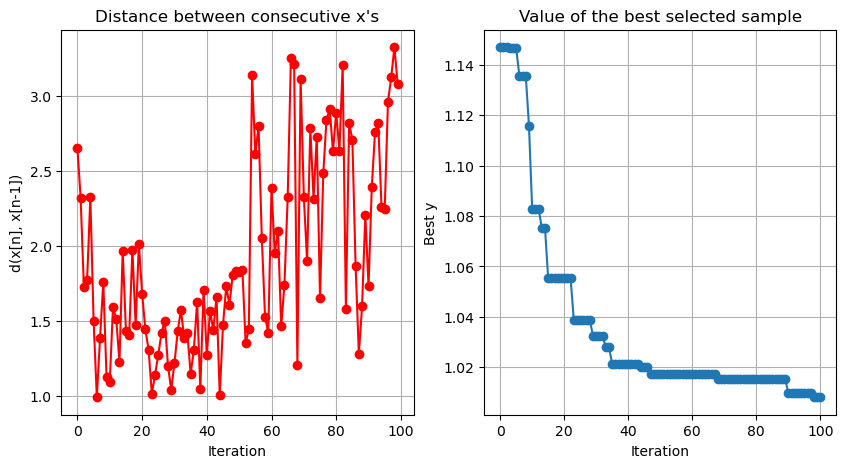

In [10]:
import GPy
import GPyOpt
from GPyOpt.methods import ModularBayesianOptimization
import numpy as np
domain = [
    {'name': f'rxn1_coef{i}', 'type': 'continuous', 'domain': (0, 1)} for i in range(n_rxns[0])
]
r_init_np = np.array(r_now[0]).reshape(1, -1)

def get_hdo_results_numpy(rxn_coef):
    print(rxn_coef)
    for n in range(n_rxns[0]):
        rxtor1.Elements(f"{n+1}").Value = rxn_coef[0, n]

    time.sleep(2)
    aspen.Engine.Run2()
    time.sleep(2)

    prod = get_carbon_number_composition(208)
    mse = sum((target_data[n] - prod[n])**2 for n in target_data.keys()) * 10
    print(f"Success: {mse}")
    return mse

# print("Test function:")
# get_hdo_results_numpy(r_init_np)


class HDO_Evaluator(object):
    def __init__(self):
        self.iteration_count = 0  # 반복 횟수 카운터 초기화

    def evaluate(self, rxn_coef):
        print(f"현재 BO Iteration: {self.iteration_count}")
        val = get_hdo_results_numpy(rxn_coef)
        self.iteration_count += 1
        return val


# Kernel function for Bayesian optimization: m52
m52 = GPy.kern.Matern52(input_dim=r_init_np.shape[1], variance=1.0, lengthscale=1.0)

hdo_evaluator = HDO_Evaluator()
objective = GPyOpt.core.task.SingleObjective(hdo_evaluator.evaluate)

# Gaussian process regression model
model = GPyOpt.models.GPModel(kernel=m52, exact_feval=True,
                              optimize_restarts=25, verbose=False)

# Acquisition function: Expected improvement (EI)
domain_space = GPyOpt.Design_space(space=domain)

acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(domain_space)
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, domain_space, optimizer=acquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

# Set Bayesian optimization
BO = ModularBayesianOptimization(model, domain_space, objective, acquisition, evaluator, r_init_np)

# Maximum time and iterations for Bayesian optimization
max_time = None
max_iter = 100
tolerance = -np.inf

# Run Bayesian optimization
BO.run_optimization(max_iter=max_iter, max_time=max_time, eps=tolerance, verbosity=False)
BO.plot_convergence()

In [ ]:
optimal_rxn_coef = BO.x_opt
print(optimal_rxn_coef)
optimal_result = hdo_evaluator.evaluate(optimal_rxn_coef.reshape(1, -1))

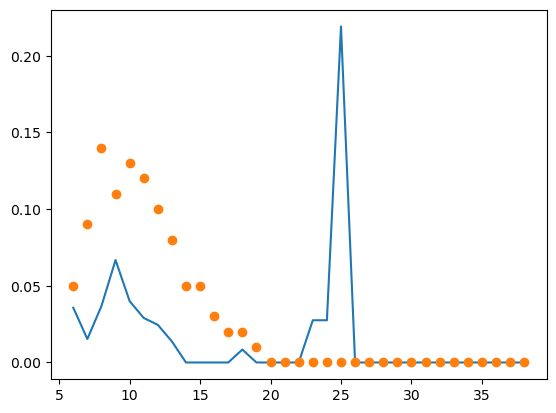

In [15]:
import matplotlib.pyplot as plt
cc = get_carbon_number_composition(208)
plt.plot(cc.keys(), cc.values(), '-')
plt.plot(target_data.keys(), target_data.values(), 'o')

* Improvement가 있긴 한데, long chain components가 너무 많이 남는다 -- 지금 C23-25 분해 반응이 포함 안 되어 있음.
* C12H16O2의 physical property parameter가 없어서 B22에서 에러 발생 -- 왜 C12가 SMR 반응기로 들어가는지?
* 150번 정도 iteration을 돌고 나면 aspen이 꺼진다 -- 먼저는 run에서 application 이 인식이 안 되면 다시 잡는 식으로 함수 구조 확장 필요.

In [ ]:
# Close the file without saving
# SaveOption: 0 = Do not save changes
#             1 = Save changes
#             2 = Prompt the user
aspen.Close(0)
aspen.Close(0)